In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
import tensorflow.keras as keras

plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('dark'))
plt.rcParams['figure.figsize'] = (20 , 20)

In [67]:
# !gdown 151WbWURL8IPXqhxi8vLCx7pmtvchegpZ --output ../data/
# !unzip ../data/PistolData_merged.zip -d ../data/
# !rm -R ../data/PistolData_merged.zip

In [68]:
import os
import cv2
datapath = '../data/PistolData_merged/'

annotfiles = sorted(os.listdir(f"{datapath}pistol_annotations"))
imagefiles = sorted(os.listdir(f"{datapath}pistol_images"))
imagefiles[:5]

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg']

In [69]:
img_h = 416
img_w = 416
def get_box(annotation):
    x , y , w , h = annotation[1] , annotation[2] , annotation[3] , annotation[4]
    x1 , y1 = int((x - w/2) * img_w) , int((y - h / 2) * img_h)
    x2 , y2 = int((x + w/2) * img_w) , int((y + h / 2) * img_h)

    return x1 , y1 , x2 , y2

def plot_image(image , annotation):
    box = get_box(annotation)
    image = cv2.rectangle(image , (box[0] , box[1]) , (box[2] , box[3]) , (255,255,0), 3)
    plt.imshow(image)
    plt.axis('off')

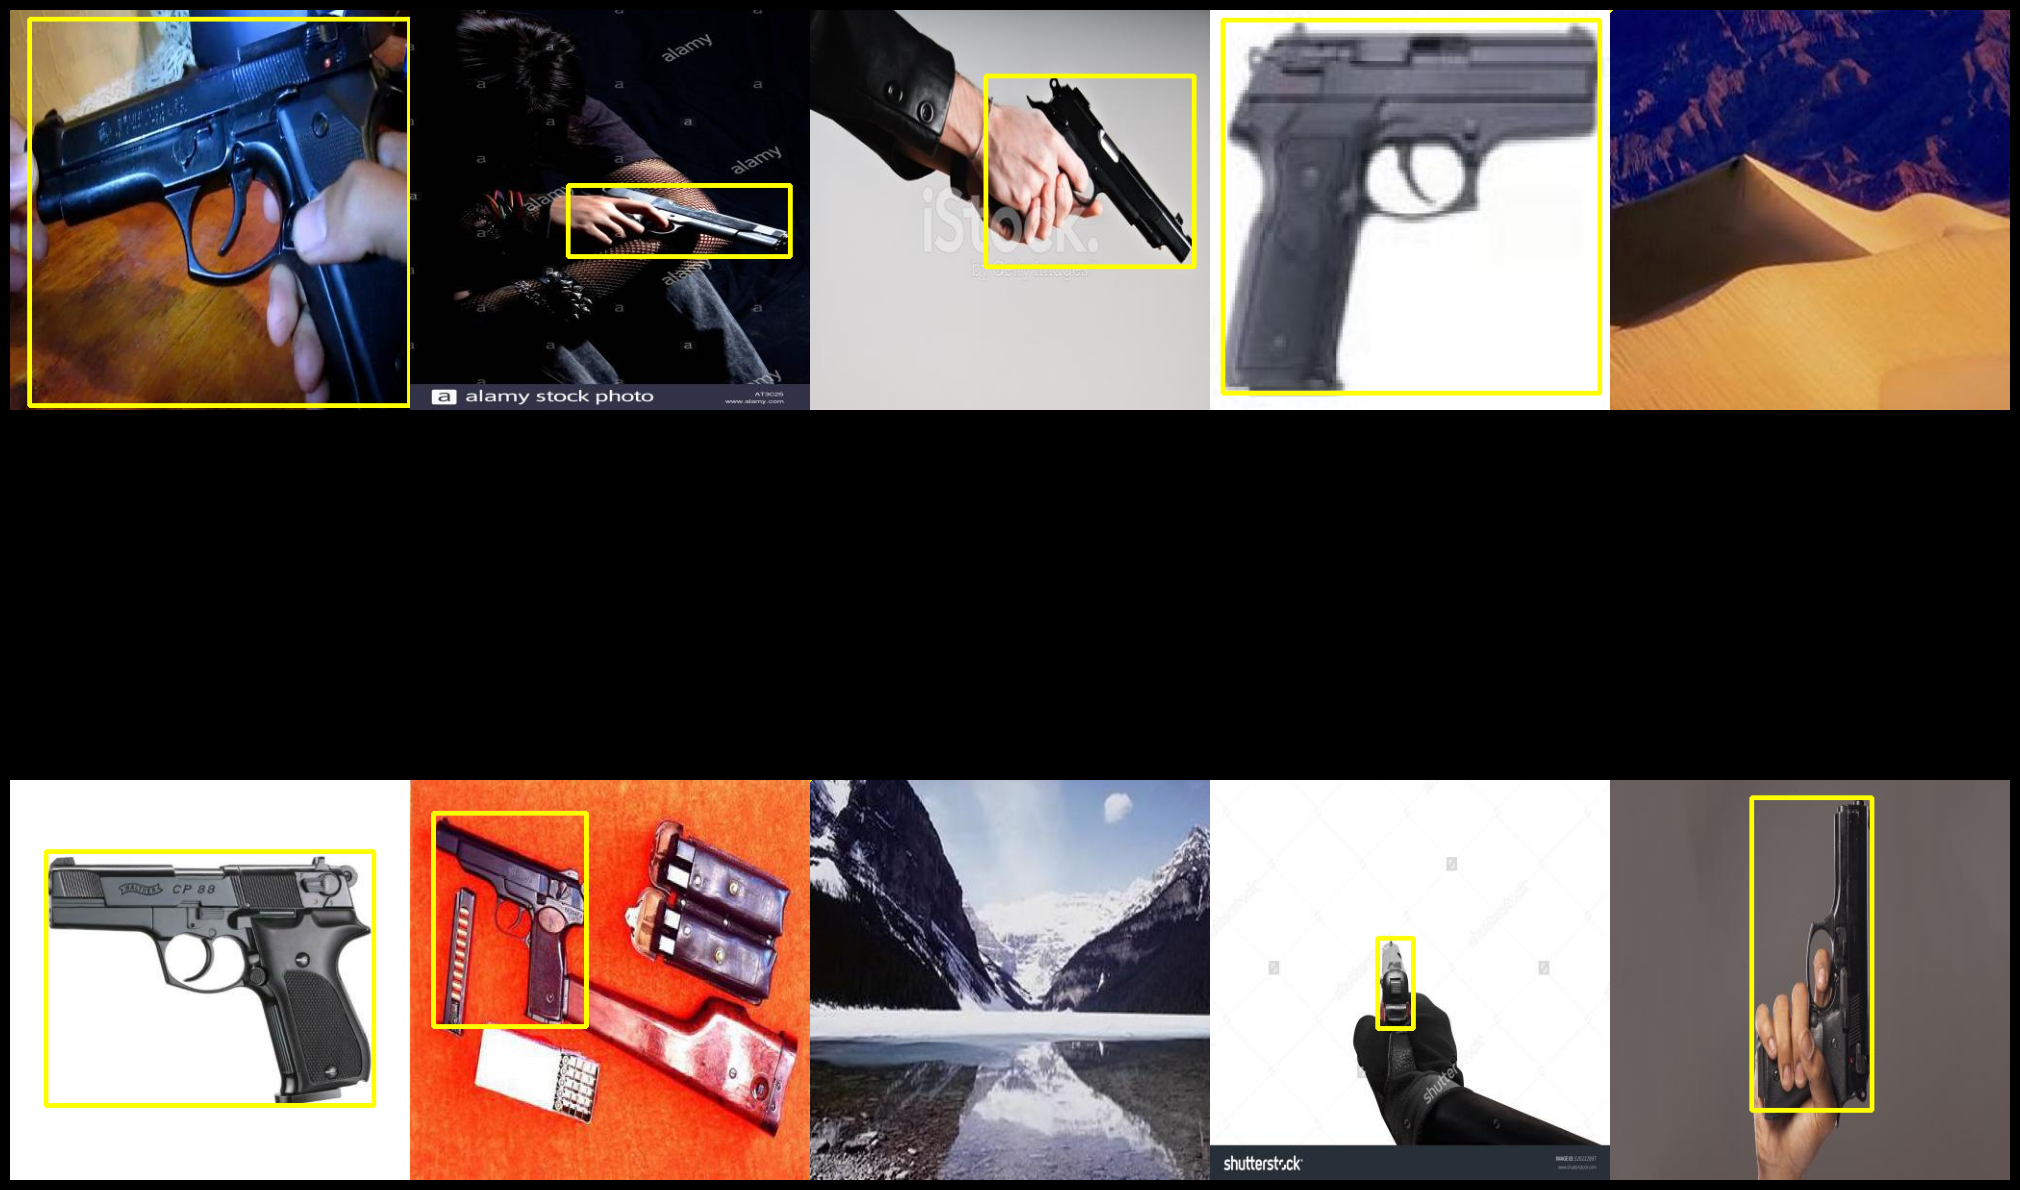

In [76]:
#plot sample images:


indices = np.random.randint(0 , len(imagefiles) , 10)

# plt.figure(figsize=(10 , 10))
for i , index in enumerate(indices):
    plt.subplot(2 , 5, i + 1)
    image = plt.imread(f"{datapath}pistol_images/{imagefiles[index]}")
    image = image.copy()
    annotationpath = f"{datapath}pistol_annotations/{annotfiles[index]}"
    # print(annotationpath , index , imagefiles[index])
    with open(annotationpath , 'r') as f:
        bbox = (f.readlines())
        annotation = [float(element) for element in bbox[0].split(' ')]
    plot_image(image , annotation)

plt.subplots_adjust(wspace= 0 , hspace = 0)
plt.tight_layout(pad = 0)